In [1]:
# Initial setup. Just run this cell once.
from __future__ import division
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style="white", context="talk")

# Probability Primer

In this notebook, we'll briefly review a few basic concepts from Probability and Statistics that underlie many of the algorithms in this course.

- Random variables and expected value
- Common distributions
- Joint and conditional probability
- Bayes' Rule
- Independence

### Random Variables

Many of the quantities we'll encounter in this class (and in machine learning in general) are represented by random variables. Formally, a random variable is a quantity (scalar, vector, or otherwise) whose _values_ are drawn from some _distribution_. For example, let $x$ be the outcome of a (fair) coin toss. We can write:

\begin{align}
x \sim \phi(1/2)
\end{align}

where $\phi(p)$ denotes the Bernoulli distribution over the possible outcomes 1 (heads) and 0 (tails), such that:

\begin{align}
P(x = 1) & = 1/2 \\ 
P(x = 0) & = (1 - 1/2) = 1/2
\end{align}

Each random variable has a domain $\mathscr{D}$, that can be either continuous (e.g. $\mathbb{R}^n$ for a multivariate Gaussian) or discrete (e.g. $\{0,1\}$ in the case of our coin toss). Formally, the distribution is a map from events in this domain to real-valued probabilities, subject to the important constraint that the probabilities sum to 1:

\begin{align}
\sum_{x' \in \mathscr{D}} P(x') = 1
\end{align}

We'll commonly skip the formal definition, and just define random variables directly in terms of their probabilities. So for an unfair coin biased to heads, we could write $ x' \sim \phi(0.8) $, or just state $P(x' = 1) = 0.8 $ or even $P(1) = 0.8$.

A random variable itself does not have a value, only a set of possible outcomes. However, we'll often want to deal with _values_ drawn from the underlying distribution, which do have definite values. For example, suppose we flip a fair coin 5 times -- call these 5 events _trials_. Then we can talk about the _values_ $ x_1, x_2, x_3, x_4, x_5 $ from these trials, which we might observe to be $x_1 = 1$, $x_2 = 0$, and so on.

### Expected Value

Consider our fair coin $x \sim \phi(1/2)$. Suppose you won \$1 when you got heads, and \$0 for tails. After 10 flips, it's easy to see that on average, you'd walk away with $5. We can compute this by summing over the possible outcomes for each (independent) flip:

$$ \sum_{i=1}^{10} \left[ \$1\cdot P(1) + \$0\cdot P(0) \right] = 10 \cdot \$1 \cdot 0.5 = \$5 $$

If we divide this by the number of flips, we can get the expected value of a single flip:

$$ \frac{1}{10}\sum_{i=1}^{10} \left[ \$1\cdot P(1) + \$0\cdot P(0) \right] = \$0.50 $$

Now if we just drop the units of \$1, we can talk about the **expected value** of the random variable $x \sim \phi(1/2)$:

$$ \text{E}[x] = \frac{1}{N}\sum_{i=1}^{N} \left[ 1 \cdot P(1) + 0 \cdot P(0) \right] = 1 \cdot P(1) + 0 \cdot P(0) = \frac{1}{2} $$

Formally, we can define this for any distribution by summing over all elements (outcomes) in the domain $\mathscr{D}$, weighted by the probability of each:

$$ \text{E}[x] = \sum_{x' \in \mathscr{D}} x' \cdot P(x') $$

_Note that this only makes sense if $\mathscr{D}$ is something we can sum over!_

In the case of a continuous domain (such as $\mathbb{R}$), we can simply replace the sum with an integral:

$$ \text{E}[x] = \int_{x' \in \mathscr{D}} x' \cdot P(x')\ dx' $$

One final note: when we need to distinguish between expectations over different distributions, we'll use a subscript: $ \text{E}_p[x] $ is the expectation of $x \sim p$, and $ \text{E}_q[x] $ is the expectation of a different random variable (also called $x$ - and typically from the same domain) over the distribution $q$.

### Linearity of Expectation

Since the expectation is just a weighted sum, it's linear in the underlying variable:

$$\begin{align} \text{E}[\alpha x] & = \alpha\ \text{E}[x] \\
\text{E}[x + y] & = \text{E}[x] + \text{E}[y] \end{align}$$

Note that - miraculously - this holds even if $x$ and $y$ are highly dependent on each other, such as two mutually exclusive events.

### Common Distributions

In this course, we'll encounter a number of common distributions that you'll want to be familiar with. Most of the random variables in NLP are discrete, representing things like words or class labels, but we'll also deal with a few continuous quantites.

#### Bernoulli (discrete - $x \in \{0,1\}$)

The Bernoulli distribution $\phi(p)$ is (the) distribution over a single binary event $x \in \{0,1\}$. The single parameter $p \in [0,1]$ represents the probability of this event, i.e. $p(1) = p$ and $p(0) = 1 - p$.

As we saw above, $\text{E}[x] = p$ for $x \sim \phi(p)$.

A natural use for this is a (biased) coin, where $P(x = 1) = p(\text{heads}) = p$. But more commonly, we'll use the Bernoulli distribution to represent the probability of some more complicated binary outcome. 

For example: you have a corpus of 1000 documents. 164 of these mention the term "solar eclipse". Now we model the event that a new document $d$ mentions "solar eclipse" as:
$$x = \mathbb{1}\{\text{"solar eclipse"} \in d\} \sim \phi(0.164) $$

In another example, suppose you were classifying emails (as spam/not spam) using logistic regression. Your model takes an example $x_i$ as input, and produces as output a number $f(x_i) = \hat{y}_i \in [0,1]$. This number represents the predicted _probability_ that $x_i$ is spam, so we can model the predicted _label_ $\bar{y}_i \in \{0,1\}$ as:
$$ \bar{y}_i \sim \phi(\hat{y}_i) = \phi(f(x_i)) $$


#### Binomial (discrete - $x \in \mathbb{Z}_n$)

Suppose you flipped a (biased) coin $x \sim \phi(p)$, $n$ times (trials). What is the probability of $k$ flips being heads?  
The Binomial distribution represents the distribution of this total - formally, $n$ independent Bernoulli trials of probability $p$.

The probability mass function for $x \sim \text{B}(n,p) $ is:

$$ P(x = k) = {n \choose k}\ p^k\ (1-p)^{(n-k)} $$

where $p^k$ represents the $k$ heads flips, $(1-p)^{(n-k)}$ represents the $n-k$ tails flips, and ${n \choose k}$ represents the number of different ways we can come up with $k$ heads. (*Aside: an alternate way of deriving this is through [Pascal's triangle](https://en.wikipedia.org/wiki/Pascal%27s_triangle), which you may be familiar with.*)

As we saw above, the expected value (mean) of this distribution is $\text{E}[x] = np$.


#### Categorical / multinomial (discrete - $x \in \{1,2,...,k\}$)

Another way of generalizing the Bernoulli distribution is to allow for more than two outcomes. Typically we represent these as integers $1,2,...,k$ - but order does not matter, and they can also be arbitrary symbols such as words drawn from a finite *vocabulary* $V$.

The **categorical distribution** (which in abuse of notation, we'll often refer to as a **multinomial distribution**) is the simplest (and most flexible) way to represent a distribution over such a set. We simply specify the probability of each element:

$$\begin{align}
P(x = 1) & = \theta_1 \\
P(x = 2) & = \theta_2 \\
\ldots & \\
P(x = k) & = \theta_k \\
\end{align}$$

And so we can write $x \sim \text{Cat}(\theta_1, \theta_2, \ldots, \theta_k)$. Often we'll treat the parameters as a vector, so $x \sim \text{Cat}(\bar{\theta})$ where $\bar{\theta} \in \mathbb{R}^k$. Note that the parameters must be normalized as to constitute a valid probability distribution:
$$ \sum_{i=1}^k \theta_i = 1 $$

Commonly, we'll visualize a categorial distribution as a bar plot:

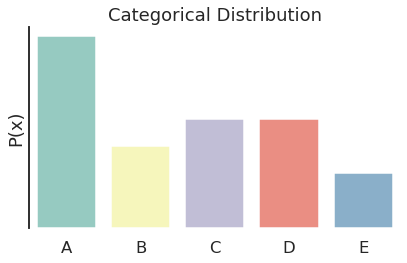

In [2]:
x = np.array(list("ABCDE"))
theta = np.array([0.35, 0.15, 0.2, 0.2, 0.1])

# Plot the distribution as bars
f = plt.figure(figsize=(6, 4)); ax = f.gca()
sns.barplot(x, theta, palette="Set3")
ax.set_ylabel("P(x)"); ax.set_title("Categorical Distribution")
sns.despine(bottom=True); plt.setp(f.axes, yticks=[]); plt.tight_layout(h_pad=3)

### Normal (continuous - $ x \in \mathbb{R}^d $)

This is the familiar Gaussian distribution, for a continuous variable $x$. In the 1-dimensional case, we have two parameters: the mean $\mu$ and the variance $\sigma^2$. The density for $ x \sim \mathcal{N}(\mu, \sigma^2) $ is:

$$ P(x) = \frac{1}{\sqrt{2\pi \sigma^2}}\ \text{exp}\left( -\frac{(x - \mu)^2}{2\sigma^2} \right) $$

This looks like the familiar bell curve:
![Normal distribution in 1 dimension](Resources/normal.svg)
*(Image source: Wikimedia Commons - public domain)*

In machine learning, we'll often deal with normal distributions in higher dimensions. In this case, the mean becomes a vector $\mu \in \mathbb{R}^d$ and the variance becomes a symmetric matrix (rank-2 tensor) $ \Sigma \in \mathbb{R}^{d \times d} $. The density for $ x \sim \mathcal{N}(\mu, \Sigma) $ (where $x \in \mathbb{R}^d $) becomes:

$$ P(x) = \frac{1}{\sqrt{(2\pi)^k \left|\Sigma\right|}}\ \text{exp}\left( -\frac{1}{2}(x - \mu)^T \Sigma^{-1} (x - \mu) \right)$$

In 2-dimensions, the standard normal ($\mu = [0,0]$, $\Sigma = I_2$) is a familiar Gaussian blur:

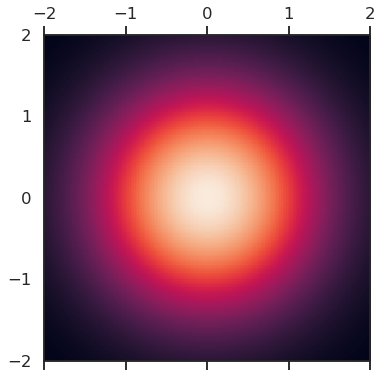

In [3]:
from scipy import stats
cs = np.linspace(-2,2,200)
xs, ys = np.meshgrid(cs, cs)
px = stats.norm.pdf(xs)
py = stats.norm.pdf(ys)
# Show as density plot
f = plt.figure(figsize=(6,6)); f.gca().matshow(px * py, extent=(min(cs), max(cs), min(cs), max(cs)))

In higher dimensions, the multivariate Gaussian has an interesting property. While in 1 dimension most of the probability mass (i.e. most samples) is close to the mean, in higher dimensions ($d \ge 3$) most of the probability mass will actually be _far_ from the center! Intuitively, this is due to the _squared_ $(x-\mu)^2$ term inside the exponent.

What does this mean for NLP? We'll see this come up in retrieval problems when we look at distances between high-dimensional vectors (typical $d > 50$). The "nearest neighbors" of a point may actually be quite far away.

Text(0.5, 1.0, 'Distribution of ||r||^2')

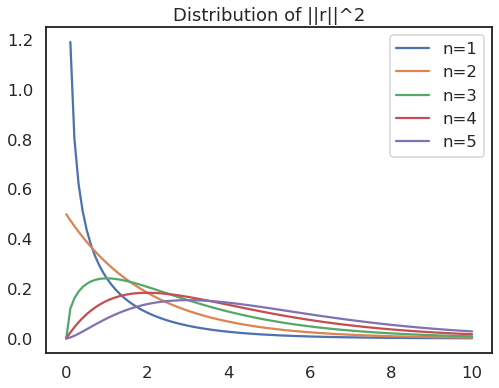

In [4]:
f = plt.figure(figsize=(8,6))
r = np.linspace(0,10,100)
for n in range(1, 6):
    ps = stats.chi2.pdf(r, n)
    f.gca().plot(r, ps, label="n={0:d}".format(n))
f.gca().legend(loc="upper right"); f.gca().set_title("Distribution of ||r||^2")

### Joint  and Conditional Probability

More often than not, we'll have multiple random variables of interest. These variables might depend on each other in interesting ways, and we'll want to be able to quantify that dependence precisely.

#### Joint Probability

One quantity to measure is the **joint probability** of a set of variables. Suppose we have random variables $x \in \mathcal{D}_x$ and $y \in \mathcal{D}_y$. Then the joint probability $P(x,y)$ is the distribution of $x$ and $y$ together, i.e. of $(x,y) \sim \mathcal{D}_x \times \mathcal{D}_y$.

One common example is a distribution over words in a sentence. Suppose all sentences are 5 words long, like "fruit flies like a banana". Then we can write random variables for each position: $w_i$ for $i = 1,2,3,4,5$. We don't know how these are dependent on each other - that will be a major focus of study in this course - but we can write the joint probability as $P(w_1, w_2, w_3, w_4, w_5)$.

#### Marginalization

Suppose you have a joint distribution $p(x,y)$. What if you're only interested in one of the variables (say, $x$)? In this case, we can _marginalize_ out the others by summing over their possible values:

$$ P(x) = \sum_{y' \in \mathcal{D}_y} P(x, y') $$

Note the dummy variable $y'$ here: this represents a variable that takes the place of $y$, but only has meaning within the sum. We'll use this convention quite frequently in this course. For example, suppose you had a model for the joint distribution $P(w_1, w_2, w_3, w_4, w_5)$ over words in 5-word sentences. If you were only interested in the first word, you could marginalize out $w_2$ through $w_5$:

$$ P(w_1) = \sum_{w_2' \in V} \sum_{w_3' \in V} \sum_{w_4' \in V} \sum_{w_5' \in V} P(w_1, w_2, w_3, w_4, w_5) $$

#### Conditional Probability

What if you knew the value of one variable, and were interested in how that affected the distribution of another? This would be the **conditional probability**. Given fixed (observed) $x$, we can write the distribution of $y$ as $P(y\ |\ x)$.

Note that the conditional probability is related to the joint probability and the marginals by the **product rule**:

$$\begin{align} P(x,y) &= P(y\ |\ x)\ P(x) \\ 
&= P(x\ |\ y)\ P(y) \end{align}$$

A common example in machine learning is where $x \in \mathbb{R}^d$ is a feature vector, and $y$ is a classification label. Then our goal in prediction is to model the conditional probability $P(y\ |\ x)$. In the case of $y \in \{0,1\}$, we can say that this is Bernoulli distributed: $P(y_i\ |\ x_i) \sim \phi(p_i)$ where $p_i = \hat{y_i} = f(x_i)$ for our model $f$.

Note that it's common to condition on several groups of variables at once, and also to draw a distinction between _parameters_ of the model and _variables_ that are conditioned on. So if $\theta$ are the trained model parameters (e.g. logistic regression weights), and $x_i$ is a vector of input features, we might write:

$$ P(y_i\ |\ x_i;\ \theta) $$

to emphasize that $\theta$ is a fixed side input (plain old data) and not treated as a random variable.

### Bayes' Rule

From the product rule, we can derive an important identity that will appear many times in this course:

$$ P(y\ |\ x) = \frac{P(x\ |\ y)\ P(y)}{P(x)} $$

This is known as **Bayes' Rule**, and is the basis for many algorithms in machine learning, such as Naive Bayes, Hidden Markov Models, Gaussian Mixture Models, and many others. Often, we'll write it in an abbreviated form that omits the denominator:

$$ P(y\ |\ x) \propto P(x\ |\ y)\ P(y) $$

Since the denominator only depends on (fixed) $x$, it's a fixed quantity for all values of $y$ we can plug in on the right. So we need not calculate it explicitly - often, it will suffice to compute the numerator and simply normalize the results such that $\sum_{y'} P(y\ |\ x) = 1$.

The left-hand-side $P(y\ |\ x)$ is known as the **posterior** distribution, which is derived by combining the **evidence** $P(x\ |\ y)$ with the **prior** beliefs $P(y)$. Intuitively, the prior is what we believe about $y$ before observing the data $x$, and the posterior is our belief after incoporating that evidence.

In machine learning, it's common for $P(y)$ to represent a prior belief about the class labels (such as "30% of words are nouns", i.e. $P(y = \text{Noun}) = 0.3$), while $P(x\ |\ y)$ represents a generative model that tells us how likely the data $x$ is to come from that class. Then we use Bayes' Rule to recover the predictive distribution $P(y\ |\ x)$. We'll explore this idea more thoroughly in Chapter 3.

### Independence

Two variables are **independent** if their distributions do not depend on each other. Formally:

$$ P(x,y) = P(x) \cdot P(y) $$

Or equivalently:
$$\begin{align} 
P(x\ |\ y) = P(x) \\
P(y\ |\ x) = P(y)
\end{align}$$

The meaning of this is straightforward: $x$ and $y$ don't depend on each other, and can be modeled separately. In machine learning, it's useful to look for independent variables, because treating them separately allows us to reduce the complexity of our model. Of course, in the real world™, variables are rarely _truly_ indepdendent - but we'll often _assume_ that they are in order to make our job easier.

A related concept is **conditional independence**, in which two variables may be related in general, but are independent when a third variable is fixed:

$$ P(x,y\ |\ z) = P(x\ |\ z) \cdot P(y\ |\ z) $$

For a simple example, suppose $P(x)$ represented the probability of stepping in a puddle, and $P(y)$ represented the probability of seeing someone with an umbrella. If you see someone with an umbrella, you'd reasonably expect it to be rainy, and your probability of stepping in a puddle would go up - so $x$ and $y$ are not independent. But if you already knew it was raining (i.e. conditioned on $z = \text{rain}$), it might be reasonable for puddles and umbrellas to be independent of each other.

### Quiz Questions

(1) **Bayes' rule**  A rare disease occurs in 1 in 100,000 people. It can be detected by a blood test 100% of the time if present. However, the test also has a 0.1% chance of coming up as a false positive in a healthy patient. If a random patient tests positive, what is the probability that they have the disease?

(2) **Independence** Consider the following counts:

|           | y = true | y = false |
|-----------|----------|-----------|
| x = true  | 1280     | 6400      |
| x = false | 6400     | 12800     |

Are the variables $x$ and $y$ independent? What about $p$ and $q$, below?

|            | y' = true | y' = false |
|------------|-----------|------------|
| x' = true  | 1600      | 6400       |
| x' = false | 3200      | 12800      |

(3) **Marginalization** Compute $P(x' =\ \text{true})$ from the table above. Compare to $P(x' =\ \text{true}\ |\ y' =\ \text{true})$ and $P(x' =\ \text{true}\ |\ y' =\ \text{false})$.